In [ ]:
import pandas as pd

# Load the dataset provided by the user
file_path = "/content/drive/MyDrive/03 Materi Data Analyst/14 eBook inSIght/Materi Exclusive/Materi 08 Daypart Analyst/CoffeeHouse_Cafe_Dataset.csv"
df = pd.read_csv(file_path)
df.head()

,Date,Time,Daypart,Category,Item,Quantity,Total Price,Transaction Type
0,2025-01-14,16:34,Afternoon,Snacks,Croissant,2,44000,Delivery
1,2025-01-16,07:44,Morning,Coffee,Americano,2,54000,Dine-in
2,2025-01-13,14:58,Noon,Drinks,Iced Tea,1,25000,Dine-in
3,2025-01-7,14:50,Afternoon,Drinks,Iced Tea,1,25000,Dine-in
4,2025-01-17,11:38,Noon,Snacks,Muffin,1,21000,Dine-in


**1. Bagaimana pola kunjungan dan transaksi pelanggan di setiap segmen waktu (pagi, siang, sore, malam)?**

In [ ]:
# Grouping data by Daypart to analyze total sales and number of transactions
daypart_analysis = df.groupby("Daypart").agg(
    Total_Transactions=("Total Price", "count"),
    Total_Sales=("Total Price", "sum"),
    Avg_Sale_Per_Transaction=("Total Price", "mean")
).reset_index()

# Display results using display function from IPython.display
# This replaces the ace_tools functionality which is not publicly available.
from IPython.display import display
display(daypart_analysis)

,Daypart,Total_Transactions,Total_Sales,Avg_Sale_Per_Transaction
0,Afternoon,182,6889000,37851.648352
1,Evening,290,12202000,42075.862069
2,Morning,325,12848000,39532.307692
3,Noon,203,9185000,45246.305419


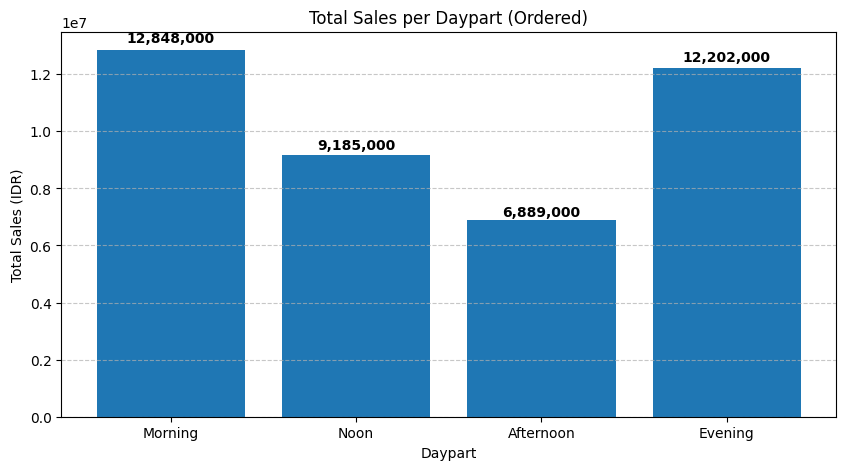

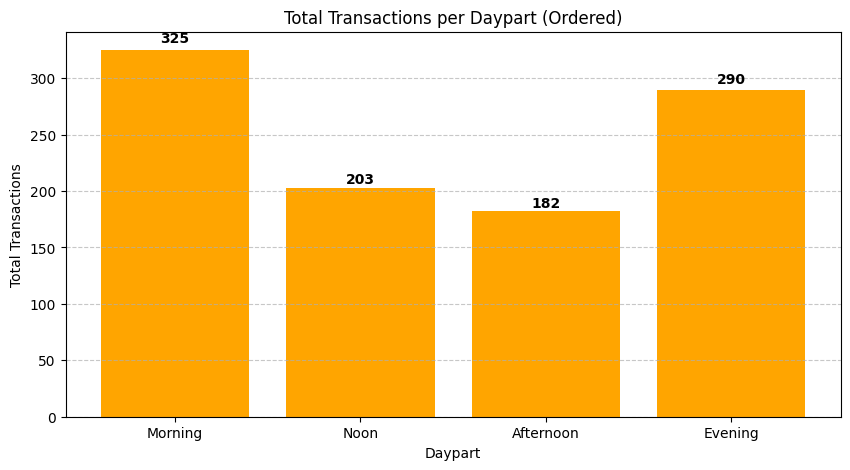

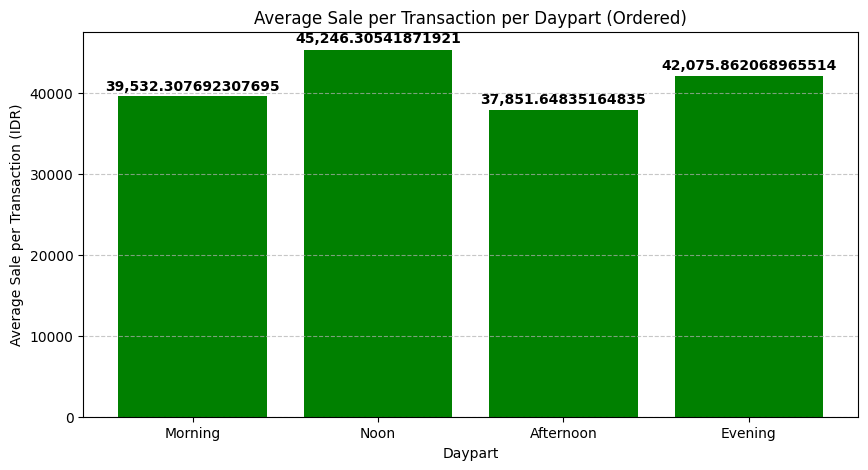

In [ ]:
import matplotlib.pyplot as plt

# Sorting dayparts in logical order
daypart_order = ["Morning", "Noon", "Afternoon", "Evening"]
daypart_analysis_sorted = daypart_analysis.set_index("Daypart").loc[daypart_order].reset_index()

# Bar chart for Total Sales per Daypart (Sorted)
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(daypart_analysis_sorted["Daypart"], daypart_analysis_sorted["Total_Sales"])
ax.set_xlabel("Daypart")
ax.set_ylabel("Total Sales (IDR)")
ax.set_title("Total Sales per Daypart (Ordered)")
ax.grid(axis="y", linestyle="--", alpha=0.7)
add_labels(ax, daypart_analysis_sorted["Total_Sales"])
plt.show()

# Bar chart for Total Transactions per Daypart (Sorted)
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(daypart_analysis_sorted["Daypart"], daypart_analysis_sorted["Total_Transactions"], color="orange")
ax.set_xlabel("Daypart")
ax.set_ylabel("Total Transactions")
ax.set_title("Total Transactions per Daypart (Ordered)")
ax.grid(axis="y", linestyle="--", alpha=0.7)
add_labels(ax, daypart_analysis_sorted["Total_Transactions"])
plt.show()

# Bar chart for Average Sale per Transaction per Daypart (Sorted)
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(daypart_analysis_sorted["Daypart"], daypart_analysis_sorted["Avg_Sale_Per_Transaction"], color="green")
ax.set_xlabel("Daypart")
ax.set_ylabel("Average Sale per Transaction (IDR)")
ax.set_title("Average Sale per Transaction per Daypart (Ordered)")
ax.grid(axis="y", linestyle="--", alpha=0.7)
add_labels(ax, daypart_analysis_sorted["Avg_Sale_Per_Transaction"])
plt.show()

**1. Total Sales per Daypart**
* Pagi (Morning) memiliki total penjualan tertinggi dibandingkan daypart lainnya.
* Siang (Noon) mengalami penurunan signifikan, yang menunjukkan berkurangnya pelanggan atau pengurangan rata-rata transaksi.
* Sore (Afternoon) memiliki total penjualan yang lebih rendah dibandingkan pagi dan malam, namun stabil.
* Malam (Evening) juga memiliki angka penjualan yang tinggi, meskipun rata-rata transaksi per pelanggan lebih kecil dibandingkan pagi.

💡 Insight:

1. Puncak penjualan terjadi di pagi dan malam hari, yang kemungkinan besar karena kebiasaan pelanggan (pagi untuk bekerja, malam untuk bersantai).
2. Siang hari mengalami penurunan signifikan, yang bisa disebabkan oleh pelanggan berpindah ke tempat lain untuk makan siang atau perubahan tren pelanggan.
3. Potensi peningkatan ada di sore hari, tetapi belum dimanfaatkan dengan maksimal.

---

**2. Total Transactions per Daypart**
* Morning memiliki jumlah transaksi tertinggi, menandakan banyak pelanggan yang datang untuk membeli kopi sebelum bekerja.
* Noon memiliki jumlah transaksi paling sedikit, yang memperkuat temuan bahwa café kehilangan pelanggan di siang hari.
* Afternoon memiliki jumlah transaksi yang stabil tetapi tidak mengalami pertumbuhan signifikan.
* Evening memiliki transaksi yang tinggi, meskipun lebih sedikit dibandingkan pagi hari.

💡 Insight:

1. Jumlah pelanggan di siang hari menurun, artinya perlu strategi khusus untuk menarik lebih banyak orang.
2. Peluang pertumbuhan di sore hari belum dioptimalkan.

---

**3. Average Sale per Transaction per Daypart**
* Rata-rata transaksi tertinggi terjadi di siang hari (Noon) meskipun total transaksi rendah. Ini menunjukkan bahwa pelanggan yang tetap datang di siang hari cenderung membeli lebih banyak item.
* Malam hari memiliki rata-rata transaksi yang lebih rendah dibandingkan siang dan pagi hari, artinya pelanggan cenderung hanya membeli satu item dan duduk lama.
* Pagi memiliki transaksi yang banyak tetapi rata-rata pembelian tidak sebesar siang.
* Sore hari memiliki rata-rata pembelian yang lebih rendah, yang menunjukkan bahwa pelanggan mungkin hanya membeli satu atau dua item saja.

💡 Insight:

1. Siang hari masih memiliki pelanggan dengan daya beli tinggi, tetapi jumlah pelanggan menurun.
2. Malam hari memiliki banyak pelanggan, tetapi mereka cenderung hanya membeli satu item, menunjukkan peluang untuk upselling.
3. Peluang peningkatan di sore hari masih bisa dieksplorasi lebih lanjut.

**2. Apa menu yang paling banyak dipesan di setiap time slot?**

In [ ]:
# Analyzing the most ordered menu items per daypart
top_menu_per_daypart = df.groupby(["Daypart", "Item"]).agg(
    Total_Orders=("Quantity", "sum")
).reset_index()

# Getting the top item for each daypart
top_menu_per_daypart = top_menu_per_daypart.sort_values(["Daypart", "Total_Orders"], ascending=[True, False])
top_menu_per_daypart = top_menu_per_daypart.groupby("Daypart").first().reset_index()

# Display results
# Instead of using the undefined 'tools' module, use the display function directly.
from IPython.display import display
display(top_menu_per_daypart)

,Daypart,Item,Total_Orders
0,Afternoon,Americano,52
1,Evening,Cappuccino,55
2,Morning,Latte,89
3,Noon,Salad,39


Apa Insight Utama dari Data Ini?

**1. Pola Konsumsi Kopi yang Kuat di Semua Daypart**

* Latte (pagi), Americano (sore), Cappuccino (malam) menunjukkan bahwa kopi menjadi produk utama di CoffeeHouse Café.
* Latte dominan di pagi hari, karena banyak pelanggan lebih memilih kopi berbasis susu untuk memulai hari.
* Americano lebih laris di sore hari, kemungkinan karena pelanggan butuh tambahan energi untuk menyelesaikan pekerjaan mereka.
* Cappuccino di malam hari, menunjukkan bahwa pelanggan tetap ingin menikmati kopi dengan cita rasa lembut sambil bersantai.

**2. Siang Hari (Noon) Berbeda: Pelanggan Lebih Memilih Makanan**

* Salad adalah menu paling populer saat siang hari, bukan kopi.
* Ini menunjukkan bahwa pelanggan siang lebih fokus pada makanan daripada minuman.
* Namun, angka total pesanan jauh lebih rendah dibandingkan time slot lain, menegaskan bahwa café mengalami penurunan jumlah pelanggan di siang hari.

**3. Potensi Strategi Upselling & Peningkatan Omzet**

* Menawarkan paket sarapan (Morning Latte + Croissant) bisa meningkatkan transaksi di pagi hari.
* Siang hari butuh lebih banyak variasi menu makan siang untuk menarik lebih banyak pelanggan. Bisa dicoba paket makan siang atau promo khusus.
* Sore hari bisa ditingkatkan dengan promo kopi + snack untuk menarik lebih banyak mahasiswa atau pekerja remote.
* Malam hari bisa fokus pada strategi upselling, misalnya dengan menambahkan promo dessert atau second drink.

---
**3. Apakah ada perbedaan pola transaksi antara hari kerja dan akhir pekan di setiap time slot?**

In [ ]:
# Converting 'Date' to datetime format to extract weekday/weekend
df["Date"] = pd.to_datetime(df["Date"])
df["Day_Type"] = df["Date"].dt.dayofweek.apply(lambda x: "Weekday" if x < 5 else "Weekend")

# Grouping data by Day_Type and Daypart to analyze differences
transaction_analysis = df.groupby(["Day_Type", "Daypart"]).agg(
    Total_Transactions=("Total Price", "count"),
    Total_Sales=("Total Price", "sum"),
    Avg_Sale_Per_Transaction=("Total Price", "mean")
).reset_index()

# Display results
# Instead of using the undefined 'tools' module, use the display function directly.
from IPython.display import display
display(transaction_analysis)

,Day_Type,Daypart,Total_Transactions,Total_Sales,Avg_Sale_Per_Transaction
0,Weekday,Afternoon,134,5126000,38253.731343
1,Weekday,Evening,216,9095000,42106.481481
2,Weekday,Morning,248,9698000,39104.838710
3,Weekday,Noon,154,6691000,43448.051948
4,Weekend,Afternoon,48,1763000,36729.166667
5,Weekend,Evening,74,3107000,41986.486486
6,Weekend,Morning,77,3150000,40909.090909
7,Weekend,Noon,49,2494000,50897.959184


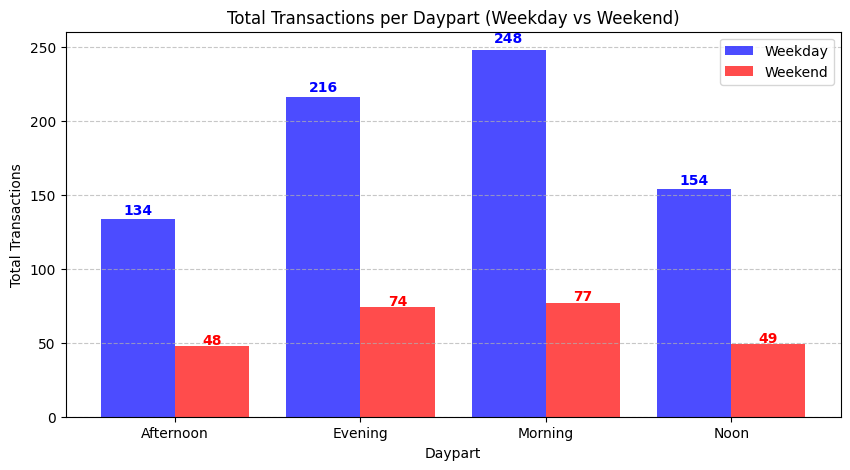

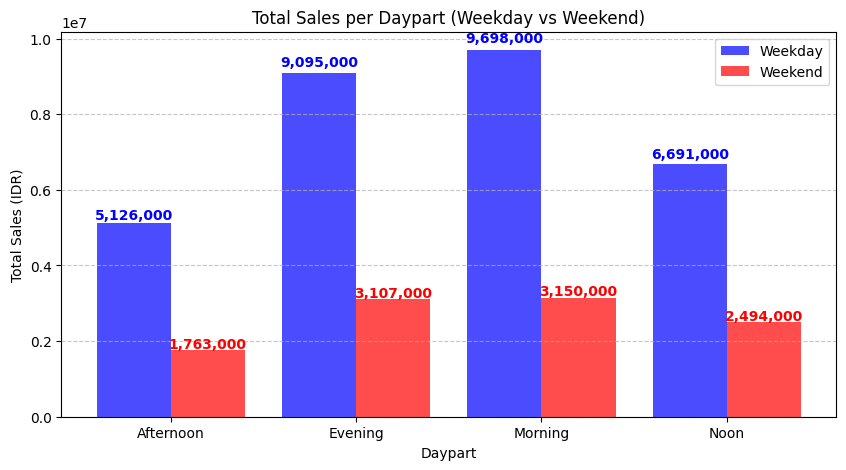

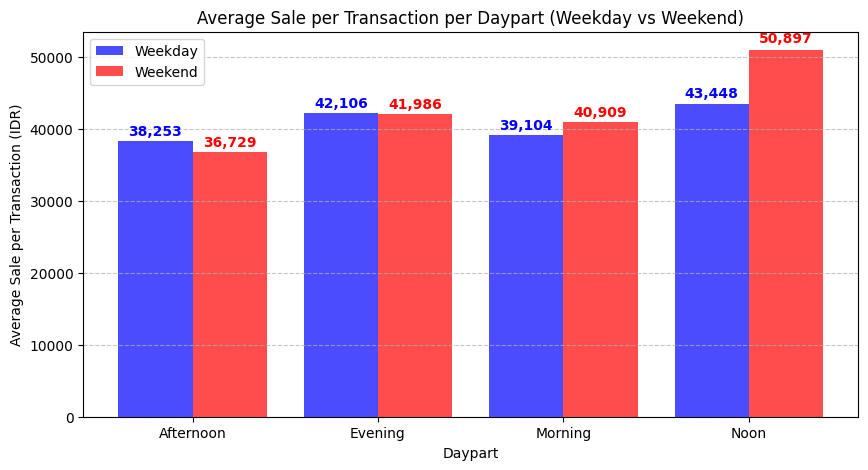

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define color mapping
colors = {"Weekday": "blue", "Weekend": "red"}

# Creating side-by-side bar charts with values for Weekday and Weekend
# Function to add labels on bars
def add_labels(ax, data):
    for i, v in enumerate(data):
        ax.text(i, v + (v * 0.02), f"{v:,}", ha='center', fontsize=10, fontweight='bold')

# Creating separate bar charts for Weekday and Weekend

# Filter data for Weekday and Weekend
weekday_data = transaction_analysis[transaction_analysis["Day_Type"] == "Weekday"]
weekend_data = transaction_analysis[transaction_analysis["Day_Type"] == "Weekend"]

# Define width for grouped bars
bar_width = 0.4
x_labels = weekday_data["Daypart"]
x = np.arange(len(x_labels))  # Creating positions for bars

# Function to add labels on grouped bars
def add_grouped_labels(ax, data1, data2, x_pos, width):
    for i, (v1, v2) in enumerate(zip(data1, data2)):
        ax.text(x_pos[i] - width/2, v1 + (v1 * 0.02), f"{int(v1):,}", ha='center', fontsize=10, fontweight='bold', color="blue")
        ax.text(x_pos[i] + width/2, v2 + (v2 * 0.02), f"{int(v2):,}", ha='center', fontsize=10, fontweight='bold', color="red")

# Total Transactions per Daypart (Side by Side with Labels)
fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.bar(x - bar_width/2, weekday_data["Total_Transactions"], bar_width, label="Weekday", color="blue", alpha=0.7)
bars2 = ax.bar(x + bar_width/2, weekend_data["Total_Transactions"], bar_width, label="Weekend", color="red", alpha=0.7)
ax.set_xlabel("Daypart")
ax.set_ylabel("Total Transactions")
ax.set_title("Total Transactions per Daypart (Weekday vs Weekend)")
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.7)
add_grouped_labels(ax, weekday_data["Total_Transactions"], weekend_data["Total_Transactions"], x, bar_width)
plt.show()

# Total Sales per Daypart (Side by Side with Labels)
fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.bar(x - bar_width/2, weekday_data["Total_Sales"], bar_width, label="Weekday", color="blue", alpha=0.7)
bars2 = ax.bar(x + bar_width/2, weekend_data["Total_Sales"], bar_width, label="Weekend", color="red", alpha=0.7)
ax.set_xlabel("Daypart")
ax.set_ylabel("Total Sales (IDR)")
ax.set_title("Total Sales per Daypart (Weekday vs Weekend)")
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.7)
add_grouped_labels(ax, weekday_data["Total_Sales"], weekend_data["Total_Sales"], x, bar_width)
plt.show()

# Average Sale per Transaction per Daypart (Side by Side with Labels)
fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.bar(x - bar_width/2, weekday_data["Avg_Sale_Per_Transaction"], bar_width, label="Weekday", color="blue", alpha=0.7)
bars2 = ax.bar(x + bar_width/2, weekend_data["Avg_Sale_Per_Transaction"], bar_width, label="Weekend", color="red", alpha=0.7)
ax.set_xlabel("Daypart")
ax.set_ylabel("Average Sale per Transaction (IDR)")
ax.set_title("Average Sale per Transaction per Daypart (Weekday vs Weekend)")
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.7)
add_grouped_labels(ax, weekday_data["Avg_Sale_Per_Transaction"], weekend_data["Avg_Sale_Per_Transaction"], x, bar_width)
plt.show()


Setelah membandingkan pola transaksi antara hari kerja (Weekday) dan akhir pekan (Weekend) di berbagai daypart (Morning, Noon, Afternoon, Evening), berikut adalah temuan utama berdasarkan visualisasi:


**1. Total Transactions per Daypart (Weekday vs Weekend)**

* Weekday memiliki jumlah transaksi yang lebih tinggi dibandingkan weekend di semua time slot.
* Morning (Pagi) memiliki transaksi terbanyak pada weekday, menunjukkan bahwa café sangat bergantung pada pelanggan pekerja kantoran yang membeli kopi sebelum bekerja.
* Noon (Siang) menunjukkan jumlah transaksi yang jauh lebih rendah di weekend dibandingkan weekday, menandakan bahwa pelanggan siang di hari kerja lebih banyak dibandingkan akhir pekan.
* Afternoon (Sore) dan Evening (Malam) juga menunjukkan tren yang sama, tetapi dengan perbedaan yang lebih kecil dibandingkan pagi dan siang.

💡 Insight:

* Weekday lebih ramai dibandingkan weekend, terutama di pagi hari.
* Siang hari di weekend sangat sepi, menandakan pelanggan café saat weekend cenderung datang sore atau malam.
* Sore dan malam memiliki transaksi yang lebih seimbang antara weekday dan weekend.

**2. Total Sales per Daypart (Weekday vs Weekend)**
* Total sales lebih tinggi di weekday dibandingkan weekend.
* Morning (07:00 - 10:00) memiliki angka penjualan tertinggi di weekday karena tingginya jumlah pelanggan kantoran.
* Noon (10:00 - 14:00) mengalami penurunan yang tajam di weekend, menunjukkan bahwa pelanggan cenderung tidak makan siang di café saat akhir pekan.
* Evening (17:00 - 21:00) masih memiliki angka penjualan yang cukup tinggi di weekend, tetapi masih lebih kecil dibandingkan weekday.

💡 Insight:

* Penjualan lebih tinggi pada weekday dibandingkan weekend di semua time slot.
* Weekend memiliki peluang pertumbuhan di siang hari, karena saat ini sangat rendah.
* Sore dan malam hari di weekend memiliki potensi yang cukup baik, tetapi masih di bawah weekday.

**3. Average Sale per Transaction per Daypart (Weekday vs Weekend)**
* Rata-rata penjualan per transaksi lebih tinggi di weekday dibandingkan weekend.
* Noon memiliki rata-rata penjualan per transaksi tertinggi di weekday, menandakan bahwa pelanggan yang tetap datang di siang hari biasanya membeli lebih banyak menu.
* Evening memiliki rata-rata transaksi yang cukup seimbang antara weekday dan weekend.
* Weekend memiliki angka yang lebih rendah secara keseluruhan, yang berarti pelanggan di akhir pekan mungkin lebih memilih menu yang lebih murah atau melakukan transaksi dalam jumlah lebih sedikit.

💡 Insight:

* Pelanggan weekday lebih cenderung melakukan transaksi yang lebih besar dibandingkan weekend.
* Weekend mungkin lebih banyak pelanggan yang hanya nongkrong dan membeli satu item saja.
* Upselling di weekend bisa menjadi strategi utama untuk meningkatkan rata-rata transaksi.

**4. Bagaimana perbandingan jumlah transaksi dine-in, take-away, dan delivery di setiap daypart?**

In [ ]:
# Grouping data by Daypart and Transaction Type
transaction_type_analysis = df.groupby(["Daypart", "Transaction Type"]).agg(
    Total_Transactions=("Total Price", "count")
).reset_index()

# Pivoting the data for better visualization
transaction_type_pivot = transaction_type_analysis.pivot(index="Daypart", columns="Transaction Type", values="Total_Transactions").fillna(0)

# Display results
# Instead of using the undefined 'tools' module, use the display function directly.
from IPython.display import display
display(transaction_type_pivot)

Transaction Type,Delivery,Dine-in,Takeaway
Daypart,,,
Afternoon,21,109,52
Evening,39,160,91
Morning,30,191,104
Noon,23,120,60


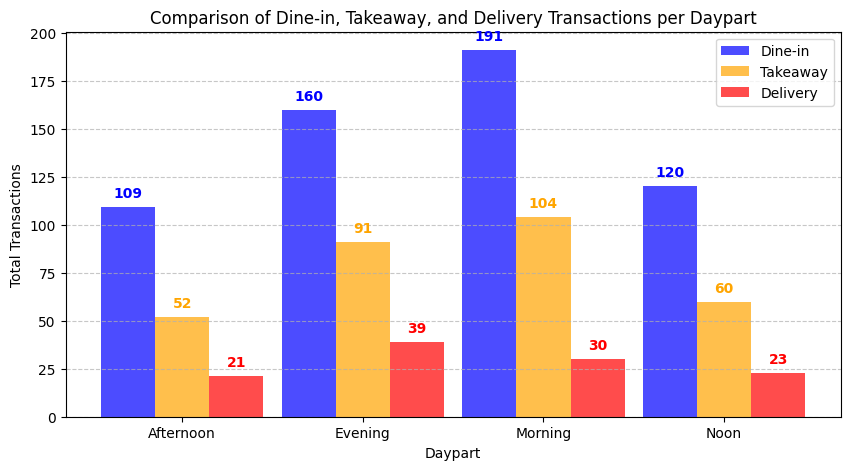

In [ ]:
# Creating a side-by-side bar chart for transaction types per daypart

# Define width for grouped bars
bar_width = 0.3
x_labels = transaction_type_pivot.index
x = np.arange(len(x_labels))  # Creating positions for bars

# Creating the bar chart
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - bar_width, transaction_type_pivot["Dine-in"], bar_width, label="Dine-in", color="blue", alpha=0.7)
ax.bar(x, transaction_type_pivot["Takeaway"], bar_width, label="Takeaway", color="orange", alpha=0.7)
ax.bar(x + bar_width, transaction_type_pivot["Delivery"], bar_width, label="Delivery", color="red", alpha=0.7)

ax.set_xlabel("Daypart")
ax.set_ylabel("Total Transactions")
ax.set_title("Comparison of Dine-in, Takeaway, and Delivery Transactions per Daypart")
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Adding labels to bars
for i, (dine, takeaway, delivery) in enumerate(zip(transaction_type_pivot["Dine-in"], transaction_type_pivot["Takeaway"], transaction_type_pivot["Delivery"])):
    ax.text(i - bar_width, dine + 5, f"{int(dine)}", ha='center', fontsize=10, fontweight='bold', color="blue")
    ax.text(i, takeaway + 5, f"{int(takeaway)}", ha='center', fontsize=10, fontweight='bold', color="orange")
    ax.text(i + bar_width, delivery + 5, f"{int(delivery)}", ha='center', fontsize=10, fontweight='bold', color="red")

plt.show()


Dari hasil visualisasi, kita bisa melihat pola transaksi Dine-in, Takeaway, dan Delivery di setiap Daypart (Morning, Noon, Afternoon, Evening). Berikut adalah temuan utama:

**1. Dine-in Mendominasi di Semua Daypart**
* Dine-in memiliki jumlah transaksi tertinggi dibandingkan Takeaway dan Delivery di semua time slot.
* Morning (07:00 - 10:00) dan Evening (17:00 - 21:00) memiliki jumlah dine-in tertinggi.
* Noon (10:00 - 14:00) dan Afternoon (14:00 - 17:00) juga memiliki jumlah dine-in yang signifikan, tetapi lebih rendah dibandingkan pagi dan malam.

💡 Insight:

* Pelanggan lebih memilih untuk menikmati kopi langsung di café (dine-in), terutama di pagi dan malam hari.
* Pagi hari kemungkinan besar dipenuhi oleh pekerja kantoran yang duduk sebentar sambil menikmati kopi sebelum berangkat kerja.
* Malam hari ramai dine-in karena pelanggan datang untuk bersantai dan bersosialisasi.

**2. Takeaway Juga Populer, Terutama di Pagi Hari**
* Morning memiliki jumlah takeaway tertinggi dibandingkan time slot lain.
* Noon dan Evening juga memiliki jumlah takeaway yang cukup besar, tetapi lebih rendah dibandingkan Morning.

💡 Insight:

* Banyak pelanggan yang terburu-buru di pagi hari memilih untuk membeli kopi dan membawa pergi (takeaway).
* Pelanggan di siang dan sore hari juga ada yang memilih takeaway, tetapi tidak sebanyak pagi.

**3. Delivery Masih Relatif Rendah, tetapi Ada Tren Meningkat di Malam Hari**

* Delivery memiliki jumlah transaksi paling rendah dibandingkan dine-in dan takeaway.
* Evening (Malam) memiliki transaksi delivery tertinggi, diikuti oleh Morning dan Noon.
* Afternoon (14:00 - 17:00) memiliki jumlah transaksi delivery yang paling rendah.

💡 Insight:

* Pelanggan lebih suka menikmati kopi langsung di café atau mengambil sendiri dibandingkan memesan via delivery.
* Malam hari memiliki peningkatan transaksi delivery, kemungkinan karena pelanggan yang tidak ingin keluar rumah setelah beraktivitas seharian.